# Iteration test
This file demonstrates how to initialize an Equilibrium object from leading order quantities and tests its accuracy.

In [1]:
# This file implements and tests recursion relations
import numpy as np
import timeit
import scipy.signal
from matplotlib import pyplot as plt
from numba import jit, njit, prange
from numba import complex128, int64    # import jit value types

# for importing parsed codes
import sys
import cProfile
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/MHD_parsed/')
sys.path.insert(1,'/Users/lanke/Desktop/Second year project/Code/python_source/')
from chiphifunc import *
from math_utilities import *
from chiphiepsfunc import *
from chiphifunc_test_suite import *
from recursion_relations import *


import MHD_parsed
debug_path = '/Users/lanke/Desktop/Second year project/Code/test_data_eduardo/'

Detected 16 CPU's. Setting n_jobs to #CPU/2.


Axis shape:


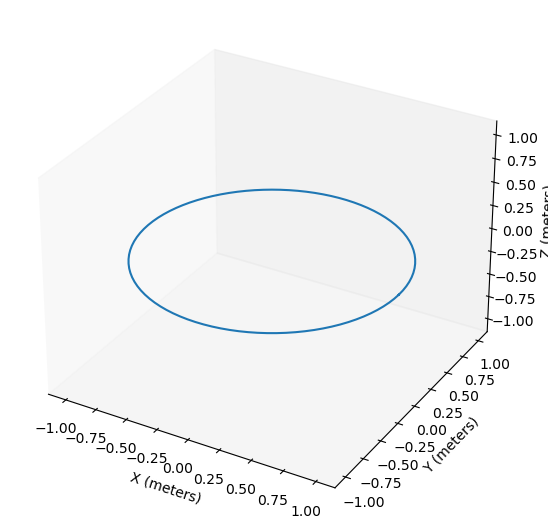

In [2]:
# No B theta
B_psi_coef_cp, B_theta_coef_cp, \
    Delta_coef_cp, p_perp_coef_cp,\
    X_coef_cp, Y_coef_cp, Z_coef_cp, \
    iota_coef, dl_p,\
    nfp, Xi_0, eta, \
    B_denom_coef_c, B_alpha_coef, \
    kap_p, tau_p = read_first_three_orders(
        debug_path+'circ/', 
        R_array=[2,0,1,2,0.0001,0],
        Z_array=[1,2,0,0.001]
    )

In [3]:
print(B_psi_coef_cp.get_order())
print(B_theta_coef_cp.get_order())
print(Delta_coef_cp.get_order())
print(p_perp_coef_cp.get_order())
print(X_coef_cp.get_order())
print(Y_coef_cp.get_order())
print(Z_coef_cp.get_order())

1
2
2
2
3
3
3


In [4]:
B_psi_coef_cp[1]

## Initializing an `Equilibrium`
### Required quantities and orders
Unknowns:

1. X_coef_cp: 2
2. Y_coef_cp: 2
3. Z_coef_cp: 2
4. B_psi_coef_cp: 0
5. B_theta_coef_cp: 2
6. iota_coef: 0
7. Delta_coef_cp: 3
8. p_perp_coef_cp: 3

Known constants:
1. B_denom_coef_c: 2
2. B_alpha_coef: 1
3. kap_p
4. dl_p 
5. tau_p
6. eta

In [5]:
B_alpha_coef.get_order()

1

In [6]:
equilibrium = Equilibrium.from_known(
    X_coef_cp=X_coef_cp.mask(2),
    Y_coef_cp=Y_coef_cp.mask(2),
    Z_coef_cp=Z_coef_cp.mask(2),
    B_psi_coef_cp=B_psi_coef_cp.mask(0),
    B_theta_coef_cp=B_theta_coef_cp.mask(2),
    B_denom_coef_c=B_denom_coef_c.mask(2),
    B_alpha_coef=B_alpha_coef.mask(1),
    iota_coef=iota_coef.mask(0), 
    kap_p=kap_p, 
    dl_p=dl_p, 
    tau_p=tau_p,
    eta=eta,
    p_perp_coef_cp = p_perp_coef_cp.mask(2), 
    Delta_coef_cp = Delta_coef_cp.mask(2))
equilibrium.get_order()

integral_mode is fft


2

## Iterate 2 orders using only the magentic equations

In [8]:
equilibrium.iterate_2(
    n_eval=4,
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    loop_max_freq=(500, 500)
)
equilibrium.iterate_2(
    B_alpha_nb2=0,
    B_denom_nm1=B_denom_coef_c[3], B_denom_n=0,
    iota_new=iota_coef[1],
    loop_max_freq=(500, 500)
)

Evaluating order 3 4
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
Time elapsed(s): 42.753045082092285
Evaluating order 5 6
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
integral_mode is fft
off-diagonal filtering skipped
off-diagonal filtering skipped
Time elapsed(s): 116.21563601493835


({'B_theta_n': <chiphifunc.ChiPhiFunc at 0x7fe8dcd83d00>,
  'B_theta_np10': <chiphifunc.ChiPhiFunc at 0x7fe8c1092050>,
  'B_psi_nm2': <chiphifunc.ChiPhiFunc at 0x7fe8dce287f0>,
  'Yn': <chiphifunc.ChiPhiFunc at 0x7fe8c1095ab0>,
  'Xn': <chiphifunc.ChiPhiFunc at 0x7fe8c1096f80>,
  'Zn': <chiphifunc.ChiPhiFunc at 0x7fe8c1094cd0>,
  'pn': <chiphifunc.ChiPhiFunc at 0x7fe8c1095f60>,
  'Deltan': <chiphifunc.ChiPhiFunc at 0x7fe8c1095720>,
  'Yn_B_theta_terms': <chiphifunc.ChiPhiFunc at 0x7fe8dcb92740>,
  'Yn1p': array([-1.11130194e+05-8.84630477e+06j,  1.19572408e+05+6.50038647e+06j,
         -1.18614137e+05-4.54611111e+06j,  1.22847403e+05+3.52460300e+06j,
         -1.37442900e+05-2.06654991e+06j,  1.46053404e+05-9.36826338e+05j,
         -1.30845170e+05+4.04258310e+06j,  1.00396113e+05-4.90074134e+06j,
         -7.81310847e+04+3.37566359e+06j,  7.12057854e+04-1.00007299e+06j,
         -7.42352976e+04-1.11635681e+06j,  8.41362127e+04+2.23715896e+06j,
         -9.77671752e+04-1.60557243e+06j,

## Accessing data and checking accuracy

X_coef_cp n = 3


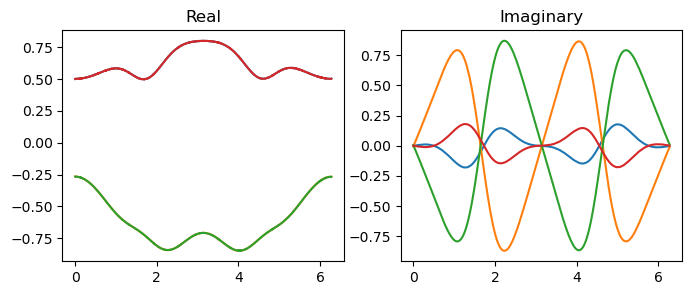

Y_coef_cp n = 3


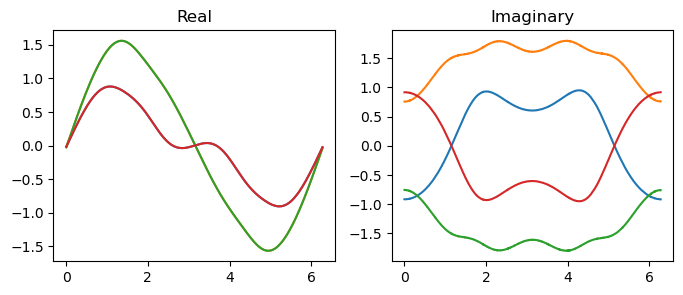

Z_coef_cp n = 3


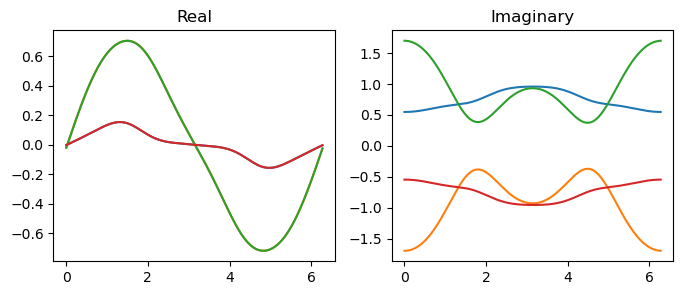

B_psi_coef_cp n = 1


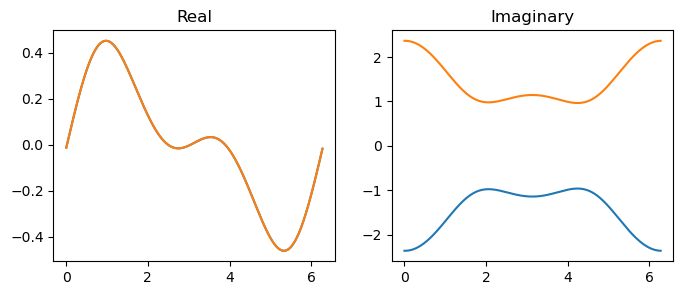

B_theta_coef_cp n = 3


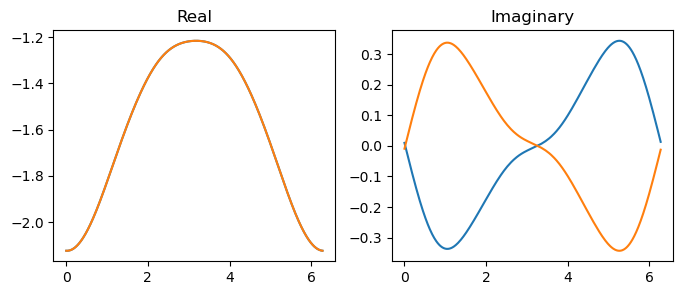

iota_coef n = 3
p_perp_coef_cp n = 3


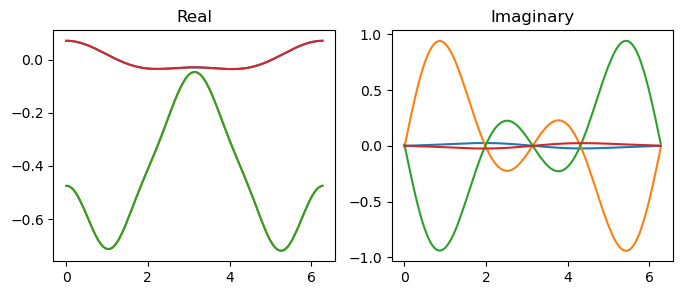

Delta_coef_cp n = 3


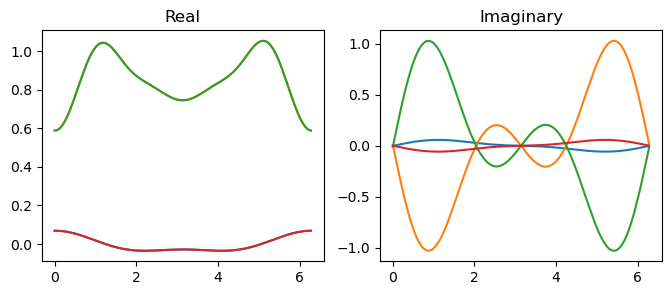

In [9]:
equilibrium.display_order(3)

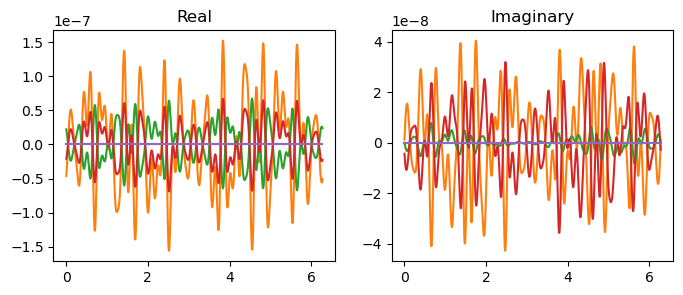

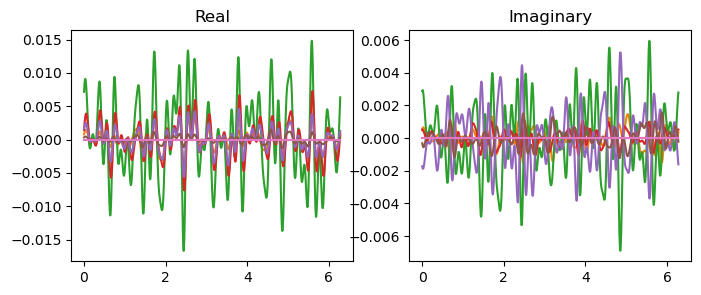

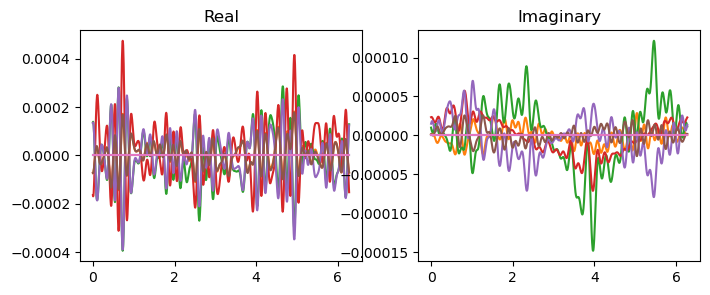

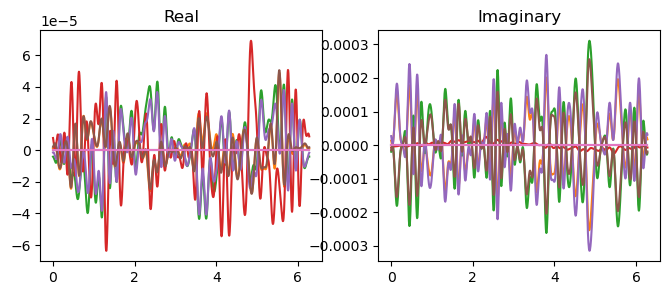

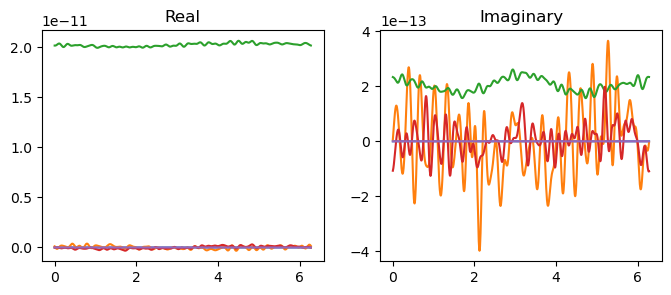

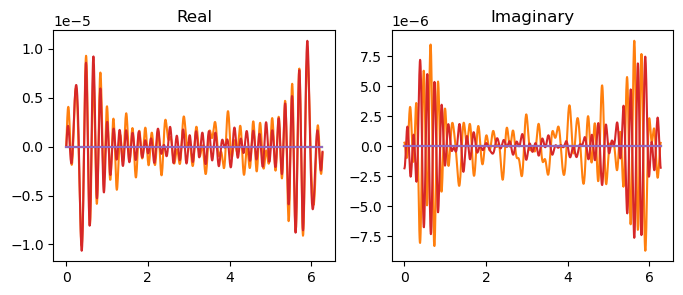

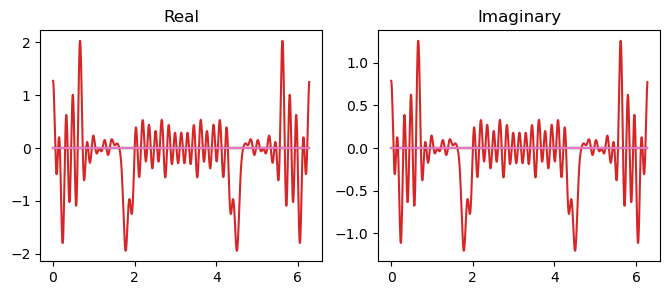

In [12]:
n=4
X_coef_cp = equilibrium.unknown['X_coef_cp']
Y_coef_cp = equilibrium.unknown['Y_coef_cp']
Z_coef_cp = equilibrium.unknown['Z_coef_cp']
B_theta_coef_cp = equilibrium.unknown['B_theta_coef_cp']
B_psi_coef_cp = equilibrium.unknown['B_psi_coef_cp']
iota_coef = equilibrium.unknown['iota_coef']
p_perp_coef_cp = equilibrium.unknown['p_perp_coef_cp']
Delta_coef_cp = equilibrium.unknown['Delta_coef_cp']
B_denom_coef_c = equilibrium.constant['B_denom_coef_c']
B_alpha_coef = equilibrium.constant['B_alpha_coef']
kap_p = equilibrium.constant['kap_p']
dl_p = equilibrium.constant['dl_p']
tau_p = equilibrium.constant['tau_p']
eta = equilibrium.constant['eta']

J = MHD_parsed.validate_J(n,
    X_coef_cp,
    Y_coef_cp, 
    Z_coef_cp,
    B_denom_coef_c, B_alpha_coef,
    kap_p, dl_p, tau_p, iota_coef)
J.filter('low_pass', 40).display_content()
Cb = MHD_parsed.validate_Cb(n,
    X_coef_cp,
    Y_coef_cp, Z_coef_cp,
    B_denom_coef_c, B_alpha_coef,
    B_psi_coef_cp, B_theta_coef_cp,
    kap_p, dl_p, tau_p, iota_coef)
Cb.filter('low_pass', 40).display_content()
Ck = MHD_parsed.validate_Ck(n, X_coef_cp, Y_coef_cp, Z_coef_cp,
    B_denom_coef_c, B_alpha_coef,
    B_psi_coef_cp, B_theta_coef_cp,
    kap_p, dl_p, tau_p, iota_coef)
Ck.filter('low_pass', 40).display_content()
Ct = MHD_parsed.validate_Ct(n, X_coef_cp, Y_coef_cp, Z_coef_cp,
    B_denom_coef_c, B_alpha_coef,
    B_psi_coef_cp, B_theta_coef_cp,
    kap_p, dl_p, tau_p, iota_coef)
Ct.filter('low_pass', 40).display_content()
I = MHD_parsed.validate_I(n, B_denom_coef_c,
    p_perp_coef_cp, Delta_coef_cp,
    iota_coef)
I.filter('low_pass', 40).display_content()
# II 4 not satisfied.
II = MHD_parsed.validate_II(n,
    B_theta_coef_cp, B_alpha_coef, B_denom_coef_c,
    p_perp_coef_cp, Delta_coef_cp, iota_coef)
II.filter('low_pass', 40).display_content()
III = MHD_parsed.validate_III(n,
    B_theta_coef_cp, B_psi_coef_cp,
    B_alpha_coef, B_denom_coef_c,
    p_perp_coef_cp, Delta_coef_cp,
    iota_coef)
III.filter('low_pass', 40).display_content()
